In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.applications.xception import Xception
from keras.models import load_model
from pickle import load
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
from playsound import playsound
from gtts import gTTS
import os
  

In [35]:
def extract_features(filename, model):
        try:
            image = Image.open(filename)
            
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((224,224))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text


#path = 'Flicker8k_Dataset/111537222_07e56d5a30.jpg/2872197070_4e97c3ccfa.jpg/1322323208_c7ecb742c6.jpg/2332540384_4cf26406a9.jpg'
max_length = 32
tokenizer = load(open(r"D:\Project\Caption generator\python-project-image-caption-generator\tokenizer.p","rb"))
model = load_model(r"D:\Project\Caption generator\python-project-image-caption-generator\models\model_9.h5")
xception_model = Xception(include_top=False, pooling="avg")
inp="140430106_2978fda105.jpg"
photo = extract_features(r"C:\Users\yaswa\Downloads\python-project-image-caption-generator\Flickr8k_Dataset\Flicker8k_Dataset\140430106_2978fda105.jpg", xception_model)
img = Image.open(r"C:\Users\yaswa\Downloads\python-project-image-caption-generator\Flickr8k_Dataset\Flicker8k_Dataset\140430106_2978fda105.jpg")

result = generate_desc(model, tokenizer, photo, max_length)





Generated Caption: Dog is walking on beach


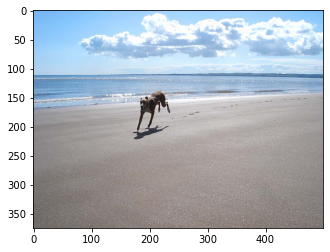

In [36]:
print("\n\n")
query = result
stopwords = ['start','end']
querywords = query.split()

resultwords  = [word for word in querywords if word.lower() not in stopwords]
result = ' '.join(resultwords)
plt.imshow(img)
print("\033[1m" + "Generated Caption:" + "\033[0m",result.capitalize())

In [37]:
def all_img_captions(filename):
    file = load_doc(filename)
    captions = file.split('\n')
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
            descriptions[img[:-2]] = [caption]
        else:
            descriptions[img[:-2]].append(caption)
    return descriptions
import string
def cleaning_text(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):

            img_caption.replace("-"," ")
            desc = img_caption.split()

            #converts to lower case
            desc = [word.lower() for word in desc]
            #remove punctuation from each token
            desc = [word.translate(table) for word in desc]
            #remove hanging 's and a 
            desc = [word for word in desc if(len(word)>1)]
            #remove tokens with numbers in them
            desc = [word for word in desc if(word.isalpha())]
            #convert back to string

            img_caption = ' '.join(desc)
            captions[img][i]= img_caption
    return captions

def load_doc(filename):
    # Opening the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [38]:
dataset_text = r"C:\Users\yaswa\Downloads\python-project-image-caption-generator\Flickr8k_text"
dataset_images = r"C:\Users\yaswa\Downloads\python-project-image-caption-generator\Flickr8k_Dataset\Flicker8k_Dataset"
filename = dataset_text + "/" + "Flickr8k.token.txt"

In [39]:
descriptions = all_img_captions(filename) 
print("Length of descriptions =" ,len(descriptions)) 

Length of descriptions = 8092


In [40]:
descriptions = cleaning_text(descriptions)

In [41]:
temp=[]
actual=[]
for i in descriptions[inp]:
    i=i.split()
    temp.append(i)
actual.append(temp)


In [42]:
predicted=[]
predicted.append(result.split())
score = corpus_bleu(actual, predicted,weights=(1, 0, 0, 0))

In [43]:
#language = 'en'
#myobj = gTTS(text=result, lang=language, slow=False)
#myobj.save("cycle1.mp3")
#os.system("mpg321 cycle1.mp3")

Generated Caption: Dog is walking on beach
BLEU SCORE       : 0.6549846024623855
INPUT IMAGE:


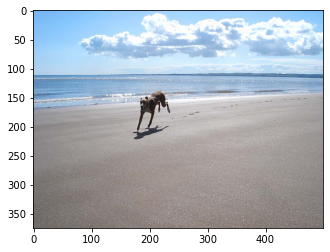

In [44]:

plt.imshow(img)
print("\033[1m" + "Generated Caption:" + "\033[0m",result.capitalize())
print("\033[1m" + "BLEU SCORE       :" + "\033[0m",score)
playsound('cycle1.mp3')
print("\033[1m" + "INPUT IMAGE:" + "\033[0m")